In [1]:
# the setup
import numpy as np
from scipy.stats import norm, triang, beta, uniform
import matplotlib.pyplot as plt

In [2]:
# define the Casino
# We define the machines and their rewards
def Casino(machine): # here we make a Casino with many slot machines

    if(machine == 1):
        return round(norm.rvs(loc=1,scale=1),2)

    if(machine == 2):
        return round(uniform.rvs(loc=0.2,scale=1),2)

    if(machine>=3 and machine <=10):
        return round(triang.rvs(loc=0,scale=1,c=0.5),2)

    if(machine >=11 and machine <=14):
        return round(triang.rvs(loc=0.5,scale=1,c=0.5),2)

    if(machine == 15): # this is the lucky one
        return round(triang.rvs(loc=0.2,scale=3.2,c=1/16),2)

    if(machine >= 16 and machine <= 20):
        return round(uniform.rvs(0,scale=1.25),2)

    if(machine >20):
        print("There are only 20 slot machines!")

In [8]:
# we need tracker variables
money = 200
cost = 2
c = 2
d = 20 # the number of different actions we have
n = [0] * d # the number of times we played each action
R = [0] * d # the total rewards we received
max_number_of_plays = 200 # the maximum number of playes
k = 0 # the number of plays
# we need a tracker for the UCBs as well
UCB = [0] * d
machine_record = []

In [11]:
# now we have to code the actual experiments and updates of the policy
# first we play all the machines once
for i in range(d):
    n[i] = n[i] + 1
    reward = Casino(i+1)
    R[i] = R[i] + reward
    money = money - cost + reward
    k = i + 1
    machine_record.append(i+1)
    UCB[i] = R[i]/n[i]+c*np.sqrt(np.log(k)/n[i])




In [ ]:
n

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [12]:
UCB

[1.425,
 1.7474100225154747,
 1.8373038073675112,
 2.190109222315395,
 2.2691225779941013,
 2.2430184728248452,
 2.767769702248751,
 2.644333980337618,
 2.56129414793641,
 2.485966026289347,
 3.184929347170073,
 3.2243078072747156,
 3.0249279712439145,
 3.2624147773596555,
 3.482251684327336,
 2.8248200450309495,
 2.895425736735434,
 2.794317681961419,
 3.0217010442847876,
 3.2727468306808163]

In [13]:
while (money > cost) & (k < max_number_of_plays):
    star = np.argmax(UCB)
    machine_record.append(star+1)
    n[star] = n[star] + 1
    k += 1
    reward = Casino(star+1)
    money = money - cost + reward
    R[star] = R[star] + reward
    UCB[star] = R[star]/n[star] + c*np.sqrt(np.log(k)/n[star])




In [14]:
np.argmax(n)+1

15

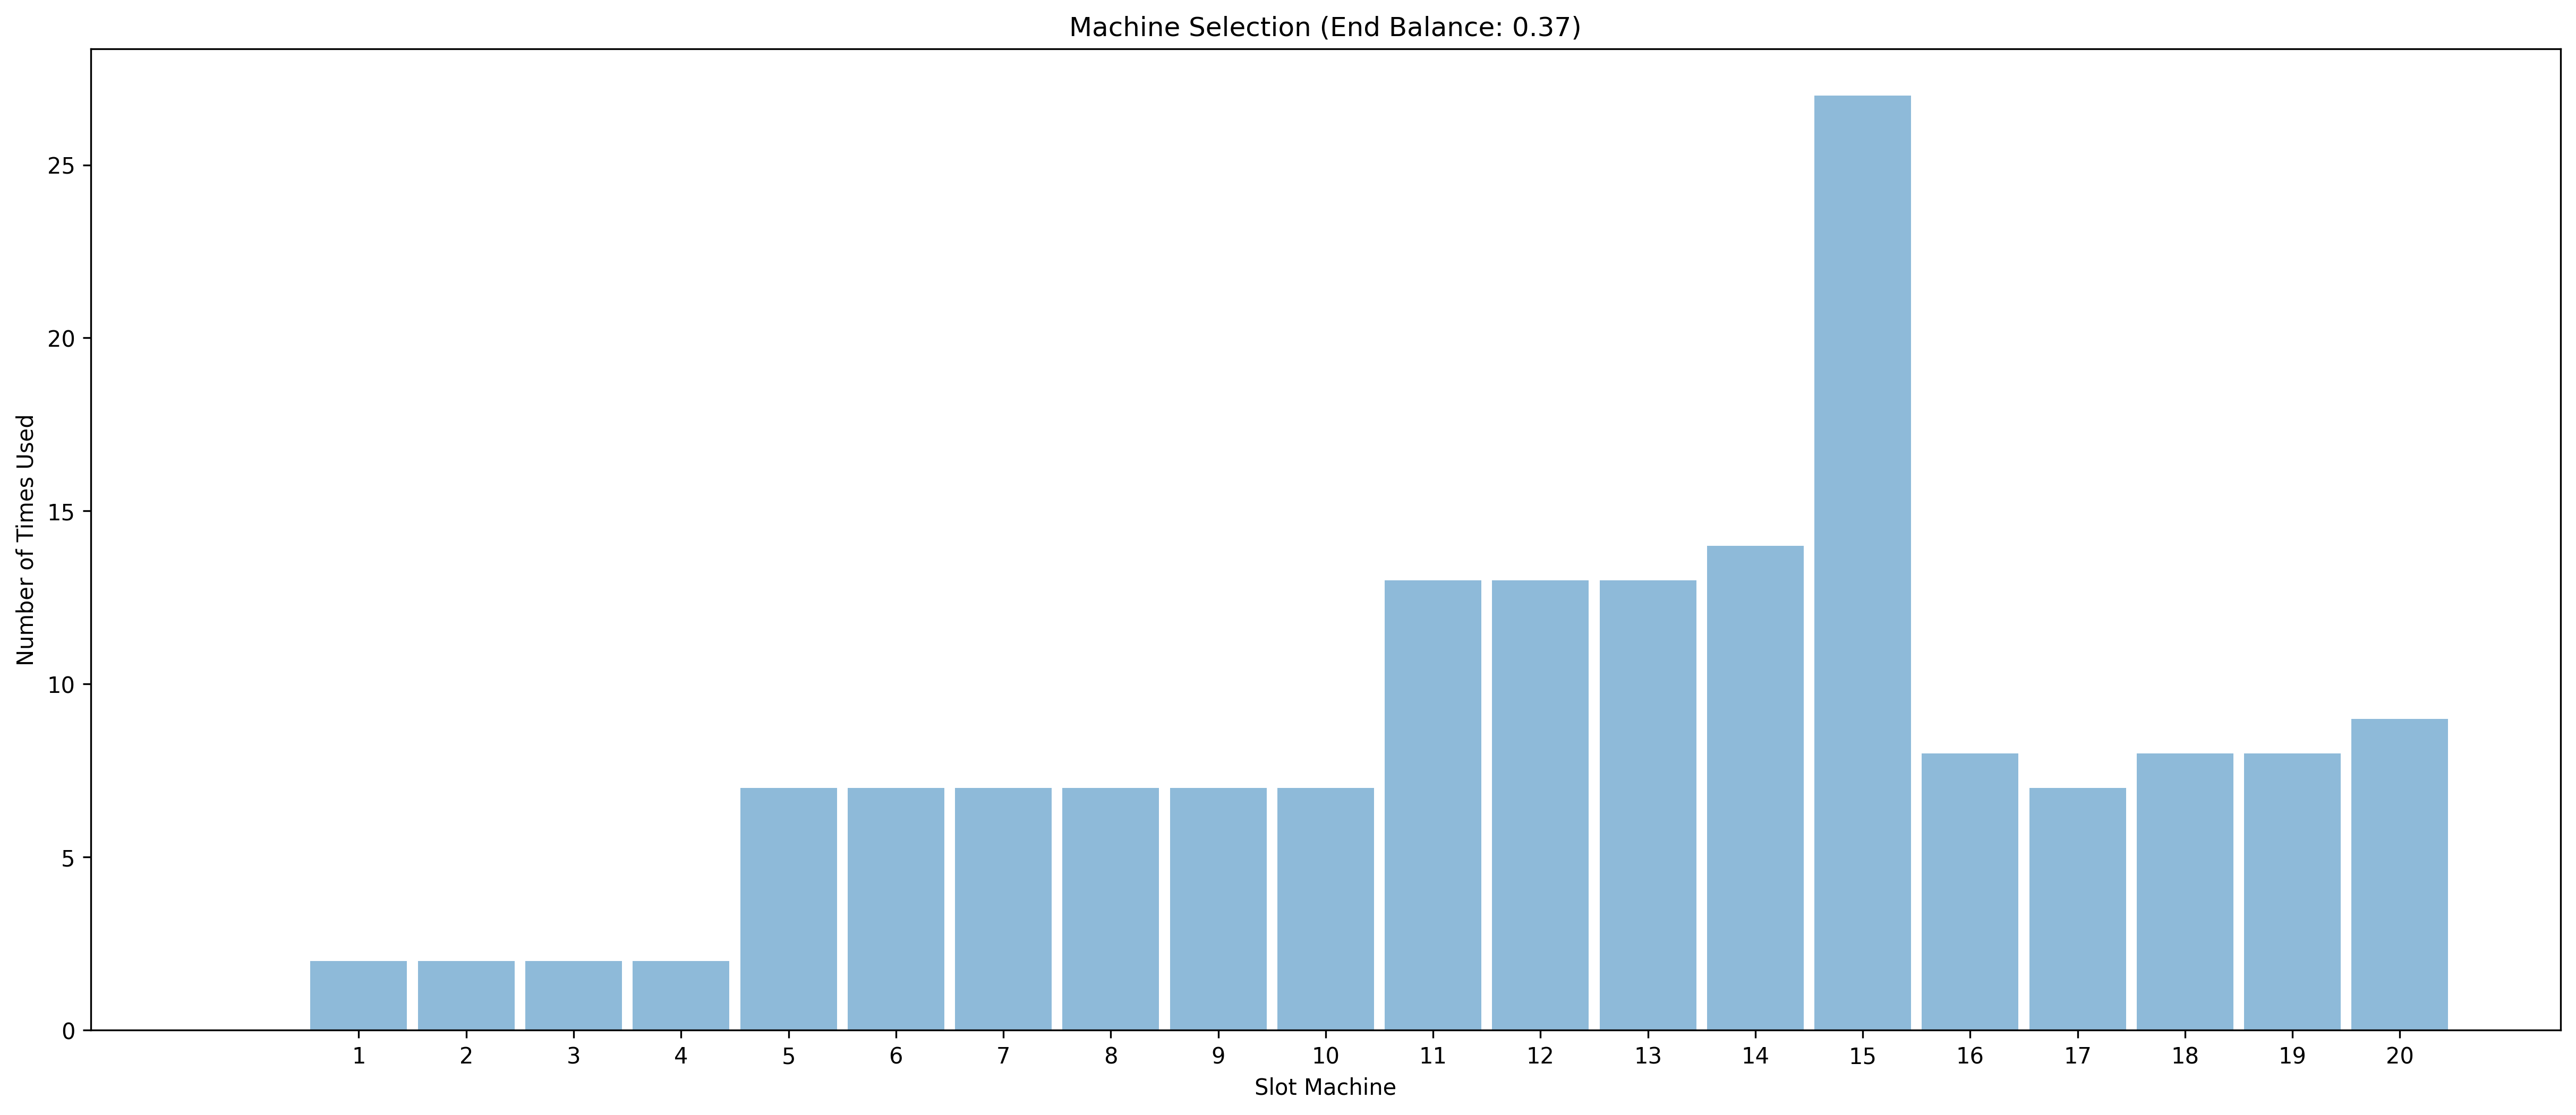

In [15]:
plt.figure(figsize=(20,8),dpi=300)
plt.hist(machine_record,bins=range(22),rwidth=0.9, alpha=0.5,align='left')
plt.title("Machine Selection (End Balance: "+ str(round(money,2))+")")
plt.xlabel("Slot Machine")
plt.ylabel("Number of Times Used")
plt.xticks(np.arange(1,21,1))
plt.show()

In [ ]:
pos = []
for i in range(20):
    pos.append(i+1)
def sample_casino(i):
    sample = []
    for j in range(1000):
        sample.append(Casino(i+1))
    return sample

In [ ]:
dat = [sample_casino(i) for i in range(20)]

In [ ]:
pos

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

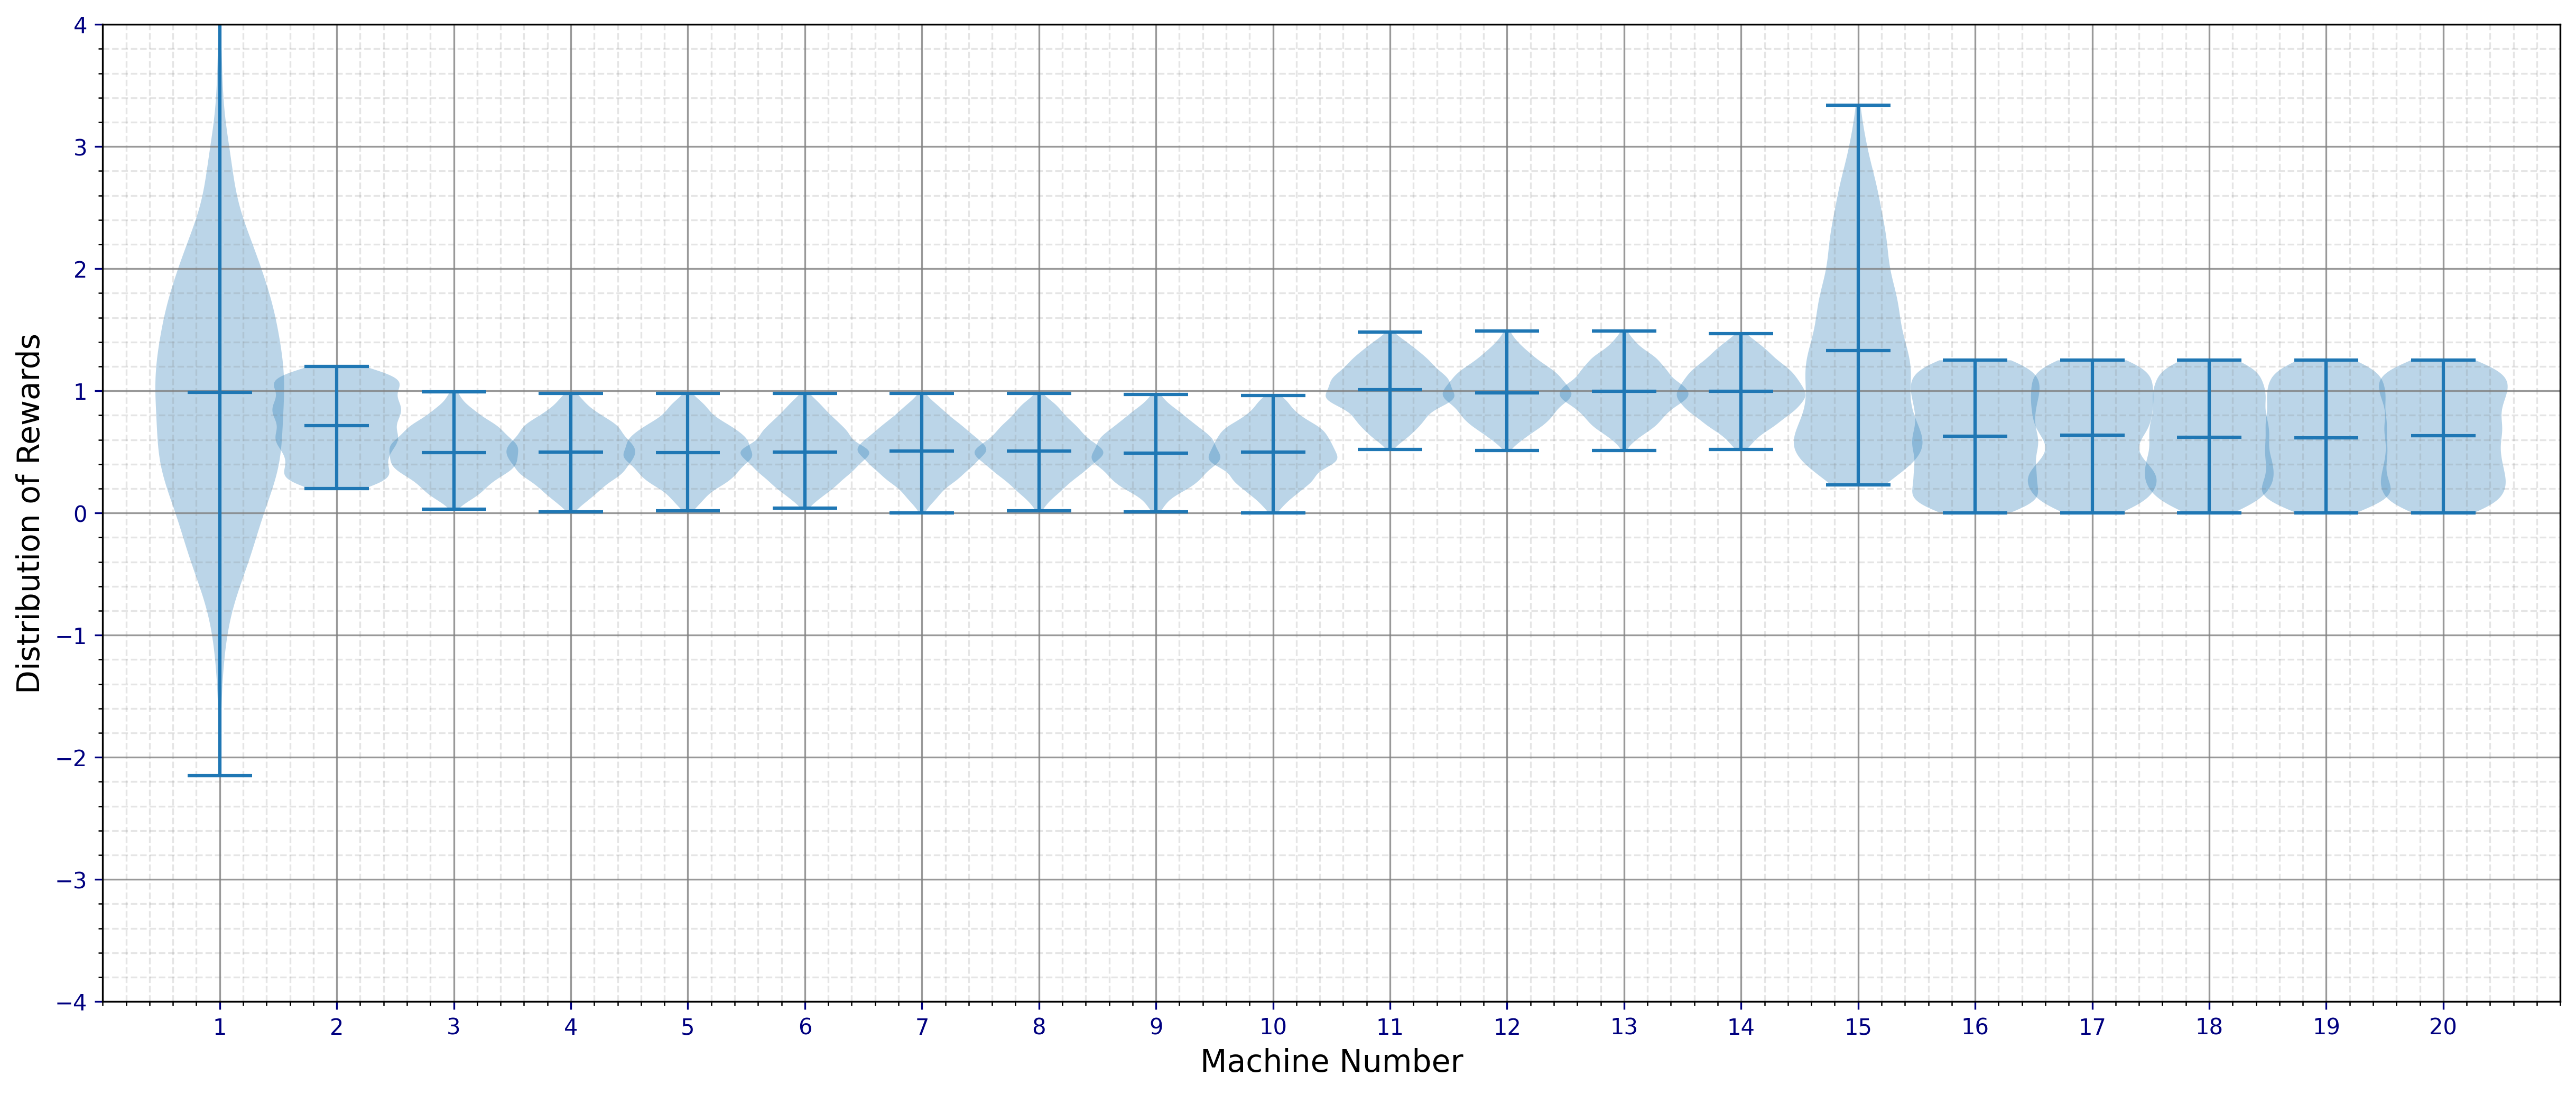

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(20,8),dpi=300)
plt.violinplot(dat, pos, points=200,vert=True, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=False)
plt.xlim(0, 21)
plt.ylim(-4, 4)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='both',nbins=21))
plt.xlabel('Machine Number',fontsize=14)
plt.tick_params(axis='x', colors='navy')
plt.tick_params(axis='y', colors='navy')
plt.ylabel('Distribution of Rewards',fontsize=14)
plt.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
plt.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.show()